In [282]:
## 예제
#1.csv폴더에서 4개의 파일을 로드(tran1,tran2,tran_d_1,tran_d_2)
#2.tran1과 tran2 유니언 결합 수행
#3.tran_d_1과 tran_d_2 유니언 결합 수행
#4.2번,3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰 2번 데이터프레임 기준으로 조인 결합 수행
#5.csv폴더에 있는 파일 2개 로드(custom_master, item_master)
#6.4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
#7.6번 과정에서 나온 데이터프레임과 item_master 조인 결합
#8.결합된 데이터프레임에서 quantity 컬럼과 item_price 컬럼 데이터로 total_price라는 새로운 변수 생성(total_price = item_price * quantity)

In [283]:
import pandas as pd

In [284]:
tran1 = pd.read_csv("./csv/tran_1.csv")
tran2 = pd.read_csv("./csv/tran_2.csv")
tran_d_1 = pd.read_csv("./csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("./csv/tran_d_2.csv")

In [285]:
concat_1_2 = pd.concat([tran1,tran2],axis="rows",ignore_index=True)
concat_tran_1_2 = pd.concat([tran_d_1,tran_d_2],axis="rows",ignore_index=True)

In [286]:
concat_1_2.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [287]:
concat_tran_1_2.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [288]:
first_join = pd.merge(concat_1_2,concat_tran_1_2,on="transaction_id",how="left")
first_join

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


In [289]:
custom_master = pd.read_csv("./csv/customer_master.csv")
item_master = pd.read_csv("./csv/item_master.csv")

In [290]:
second_join = pd.merge(first_join,custom_master,on="customer_id",how="left")
second_join.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0


In [291]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [292]:
third_join = pd.merge(second_join,item_master,on="item_id",how="left")
third_join.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000


In [293]:
third_join['total_price'] = third_join['quantity'] * third_join['item_price']
third_join

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [294]:
third_join.drop("price",axis=1,inplace=True)

In [295]:
third_join

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [270]:
third_join.loc[third_join["gender"]=="M","gender"]="남자"
third_join

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,남자,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,남자,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,남자,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,남자,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,남자,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [296]:
copy_df = third_join.copy()

In [297]:
third_join.loc[third_join["gender"]=="F","gender"]="여자"
third_join

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,여자,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,여자,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [298]:
flg_null = third_join["gender"].isna()
flg_null
third_join.loc[flg_null,"gender"]="무응답"
third_join

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,여자,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,무응답,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,여자,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,무응답,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [273]:
third_join.head(2)

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,남자,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,남자,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000


In [301]:
group_data = third_join[['item_name','total_price']].groupby('item_name').sum()

In [302]:
group_data.sort_values("total_price", ascending=False).head(1)

,total_price
item_name,
PC-E,382620000


In [303]:
# M->남자, F->여자로 바꾸기 전 데이터프레임 복사본
copy_df

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [306]:
# apply()사용해 남자 여자 변경

def change(x):
    if x=="M":
        result="남자"
    else:
        result="여자"
    return result

copy_df["gender"].apply(change)    

0       남자
1       남자
2       여자
3       남자
4       남자
        ..
7139    여자
7140    남자
7141    여자
7142    여자
7143    남자
Name: gender, Length: 7144, dtype: object

In [308]:
copy_df["gender"].apply(lambda x:"남자" if(x=="M") else ("여자" if(x=="F") else "무응답"))

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object

In [309]:
# pd.to_datetime으로 바꾸지 않으면 현재는 그냥 문자열
# format="%Y-%m-%d %H:%M" (데이터가 흔히 사용되는 날짜 형식인 경우 지정 안해도 자동으로 인식)
third_join["payment_date"] = pd.to_datetime(third_join["payment_date"],format="%Y-%m-%d %H:%M:%S")
third_join.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,여자,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000


In [311]:
# 시계열 데이터에서 월-년 추출해 새로운 파생변수 payment_month_year 생성
# 시계열 데이터는 한국적 시간 순서(년,월,일,시간 순서)로만 사용 가능

third_join["payment_month_year"] = third_join["payment_date"].dt.strftime("%m-%Y")

In [313]:
third_join.head()

,transaction_id,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month_year
0,T0000000113,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02-2019
1,T0000000114,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,02-2019
2,T0000000115,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,여자,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000,02-2019
3,T0000000116,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02-2019
4,T0000000117,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000,02-2019


In [316]:
third_join[['payment_month_year','total_price']]

,payment_month_year,total_price
0,02-2019,210000
1,02-2019,50000
2,02-2019,120000
3,02-2019,210000
4,02-2019,170000
...,...,...
7139,07-2019,180000
7140,07-2019,85000
7141,07-2019,100000
7142,07-2019,85000


In [333]:
# 월별 거래량 확인
# group_data = third_join[['payment_month_year','total_price']].groupby('payment_month_year').sum()
group_data = third_join[['payment_month_year','total_price']].groupby('payment_month_year').agg(["mean","sum"])
group_data

total_price           
                             mean        sum
payment_month_year                          
02-2019             137615.979381  160185000
03-2019             135791.701948  160370000
04-2019             135565.878378  160510000
05-2019             132837.606838  155420000
06-2019             136464.226290  164030000
07-2019             137264.682220  170620000

In [ ]:
!pip install matplotlib

<AxesSubplot:xlabel='payment_month_year'>

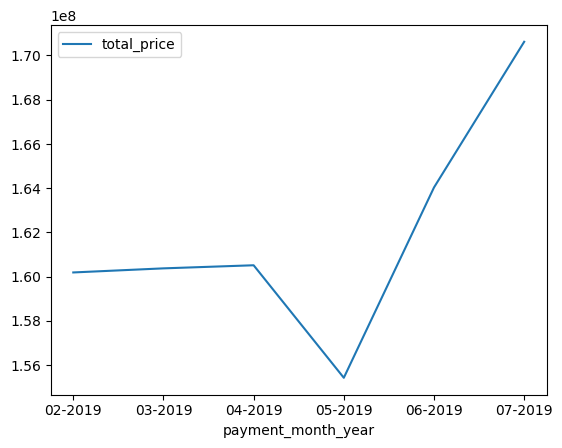

In [320]:
group_data.plot()

<AxesSubplot:xlabel='payment_month_year'>

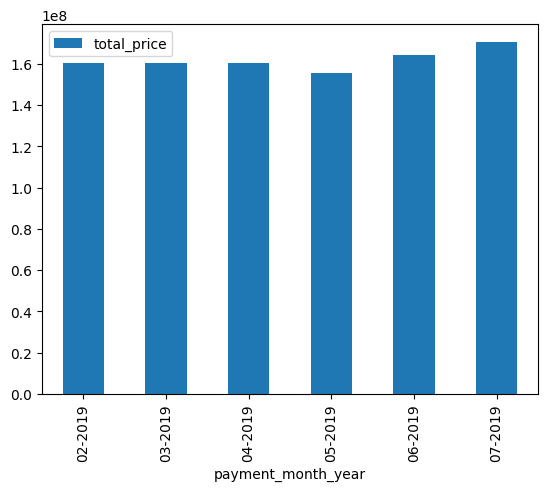

In [322]:
group_data.plot.bar()

In [331]:
# pivot_table->데이터 요약본or그룹화 용도
pivot_data = pd.pivot_table(third_join,index="payment_month_year",aggfunc=["sum","mean","min","max","std"],values="total_price")
pivot_data

,sum,mean,min,max,std
,total_price,total_price,total_price,total_price,total_price
payment_month_year,,,,,
02-2019,160185000,137615.979381,50000,420000,68742.915481
03-2019,160370000,135791.701948,50000,420000,69004.941844
04-2019,160510000,135565.878378,50000,420000,69163.709044
05-2019,155420000,132837.606838,50000,420000,68325.812982
06-2019,164030000,136464.226290,50000,420000,67280.793796
07-2019,170620000,137264.682220,50000,420000,68590.008800


<AxesSubplot:xlabel='payment_month_year'>

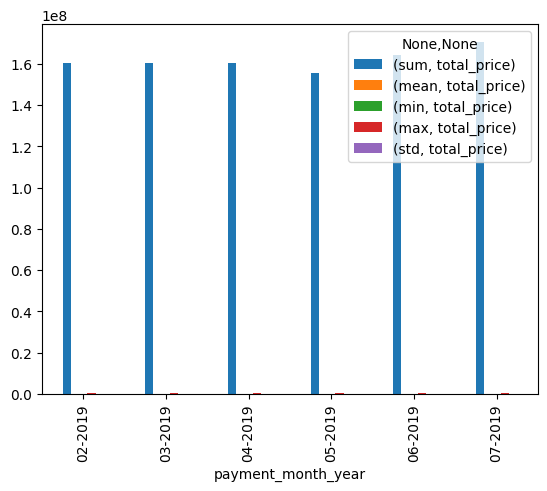

In [330]:
pivot_data.plot.bar()